In [25]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline 
from numpy.polynomial.polynomial import polyfit
import scipy.stats as st
import random 


# Read in CSV File
cases_df = pd.read_csv("output_data/owid_clean.csv")

# Preview CSV file
cases_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Brazil,0.0,0.0,NaN,NaN
1,2020-01-01,Brazil,0.0,0.0,NaN,NaN
2,2020-01-02,Brazil,0.0,0.0,NaN,NaN
3,2020-01-03,Brazil,0.0,0.0,NaN,NaN
4,2020-01-04,Brazil,0.0,0.0,NaN,NaN


# Countries' Total Cases 

In [26]:
# GroupBy Country and set index for visualization
cases_df.groupby(["location"])
cases_df.set_index('location')
cases_df

# Generate colors for each country
colors = []
for i in range(11):
    rgb = (random.uniform(0,.5),random.uniform(0,.5),random.uniform(0,.5))
    colors.append(rgb)

# Plot Total Cases over Time for each country
plt.plot_date(cases_df['date'],cases_df['total_cases'],xdate=True,color=colors)
plt.title("Date vs Total Cases by Country")
plt.xlabel("Date")
plt.ylabel("Total Cases")


# Correct Axes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

plt.show()

ValueError: Invalid RGBA argument: [(0.2638056275923287, 0.1436532246189644, 0.05226671774699532), (0.2318597037339542, 0.2503237691893998, 0.0943895891260979), (0.3561570524382899, 0.15403130707985302, 0.07629207734251747), (0.46221331878549926, 0.12280297585727301, 0.41682592119215567), (0.4886595179452651, 0.49866634615031236, 0.437046908801979), (0.45655696963878717, 0.18007330491228518, 0.0932991817679551), (0.43803982002578074, 0.043979427872002375, 0.1896867450160568), (0.0913829875806546, 0.46297660719848405, 0.22056003638378446), (0.13381577685040608, 0.42523912298472616, 0.2381326748009303), (0.01600710145156342, 0.4386334412291872, 0.26655739850769095), (0.027032893437111016, 0.3149517336058044, 0.26804545881274794)]

<Figure size 432x288 with 1 Axes>

# Countries' Total Deaths

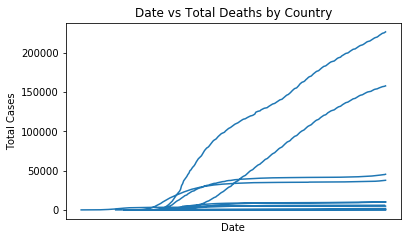

In [27]:
# GroupBy Country and set index for visualization
cases_df.groupby(["location"])
cases_df.set_index('location')
cases_df

# Plot Total Cases over Time for each country
plt.plot(cases_df['date'],cases_df['total_deaths'])
plt.title("Date vs Total Deaths by Country")
plt.xlabel("Date")
plt.ylabel("Total Cases")


# Correct Axes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()


plt.show()